# Analysis
1. As of March 8th, 2018, CBS is by far the most "positive" new source, followed by BBC. There's then a large drop-off in compound sentiment score to NY Times, while Fox News and CNN follow with negative scores.
2. A large portion of each outlet's tweets are "neutral". This suggests that certain tweets fall on extreme ends of the polarity spectrum and skew the overall compound score for each outlet.
3. No two outlets have very similar sentiment scores. CBS has about twice as high of a compound score as BBC, who in turn has about 15 times as high of a score as NYT, while Fox is relatively negative, and CNN even moreso (as of 3/8/2018 14:16).

In [59]:
# Dependencies
import tweepy
import datetime
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import config as c

In [60]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [61]:
consumer_key = c.consumer_key
consumer_secret = c.consumer_secret
access_token = c.access_token
access_token_secret = c.access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [62]:
# build list of target terms
target_terms = ['@BBC', '@CBS','@CNN', '@FoxNews', '@nytimes']

# build empty DF to hold tweets
tweets_df = pd.DataFrame(columns={"Media Outlet","Tweet Text","Compound Score","Positive Score", 
                                  "Neutral Score", "Negative Score"})

In [63]:
# api call loop to build df

compound_list = []
outlets = []
tweet_text = []
dates = []
pos_list = []
neu_list = []
neg_list = []
compound_averages = []

for target in target_terms:
    
    outlet_compounds = []

    public_tweets = api.user_timeline(target, count=100)

    for tweet in public_tweets:

        compound = analyzer.polarity_scores(tweet['text'])['compound']
        pos = analyzer.polarity_scores(tweet['text'])['pos']
        neu = analyzer.polarity_scores(tweet['text'])['neu']
        neg = analyzer.polarity_scores(tweet['text'])['neg']

        compound_list.append(compound)
        outlets.append(target)
        pos_list.append(pos)
        neu_list.append(neu)
        neg_list.append(neg)
        dates.append(tweet["created_at"])
        tweet_text.append(tweet["text"])
        outlet_compounds.append(compound)
        
    compound_averages.append(np.mean(outlet_compounds))

In [64]:
# get current time
now = datetime.datetime.now()
today = now.strftime("%Y-%m-%d %H:%M")
today

'2018-03-08 14:16'

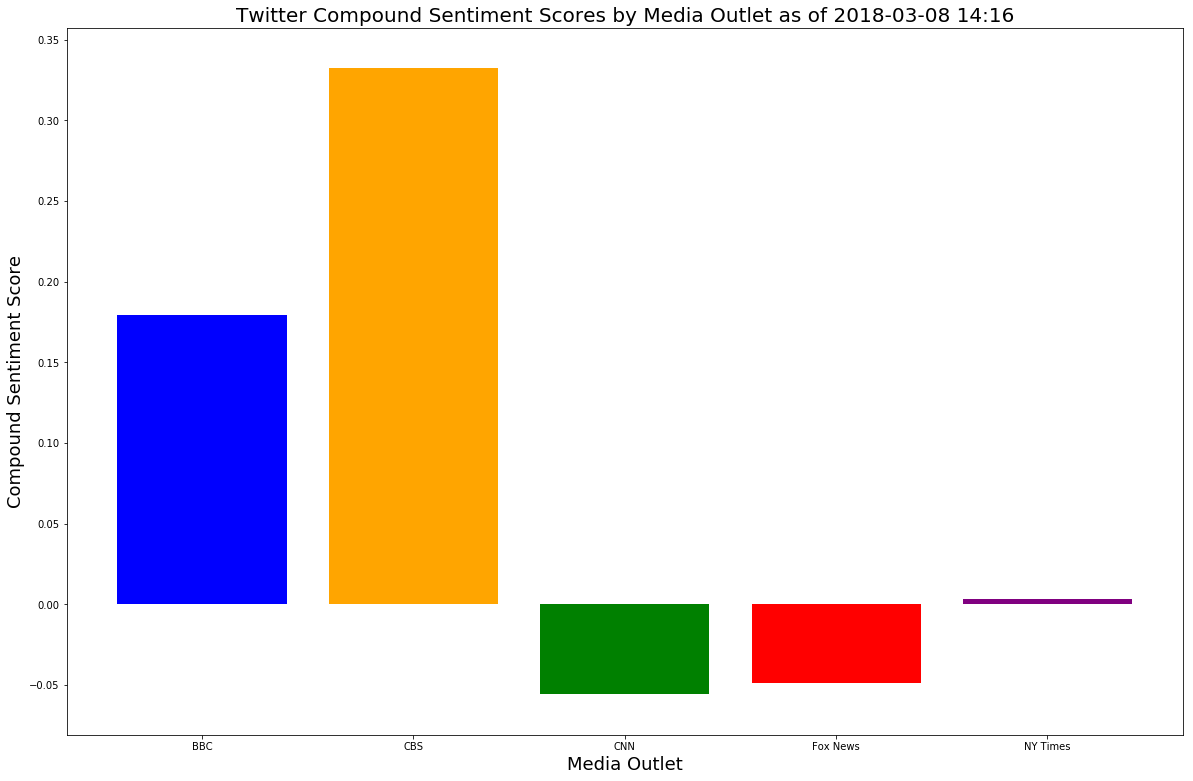

In [65]:
# plot each outlet's compound score in bar graph
plt.bar(np.arange(len(target_terms)), compound_averages, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xticks(np.arange(len(target_terms)), ['BBC', 'CBS', 'CNN', 'Fox News', 'NY Times'])

# labels
plt.title("Twitter Compound Sentiment Scores by Media Outlet as of " + today, fontsize='20')
plt.xlabel('Media Outlet', fontsize='18')
plt.ylabel('Compound Sentiment Score', fontsize='18')

# y lim
plt.ylim(np.min(compound_averages)-0.025, np.max(compound_averages)+0.025)

# save to png
plt.savefig('outlet_bars.png')
plt.show()

In [68]:
# dump lists into df
tweets_df["Media Outlet"] = outlets 
tweets_df["Tweet Text"] = tweet_text 
tweets_df["Date"] = dates 
tweets_df["Positive Score"] = pos_list 
tweets_df["Neutral Score"] = neu_list 
tweets_df["Negative Score"] = neg_list 
tweets_df["Compound Score"] = compound_list
tweets_df.to_csv('tweets_df.csv', encoding='utf-8')
tweets_df.head()

,Media Outlet,Positive Score,Tweet Text,Compound Score,Negative Score,Neutral Score,Date
0,@BBC,0.000,Lucy and Lee are back! 🙌🎉\n\n#NotGoingOut | 9p...,0.0000,0.000,1.000,Thu Mar 08 20:03:04 +0000 2018
1,@BBC,0.000,What advice would YOU give your younger self? ...,0.0000,0.000,1.000,Thu Mar 08 18:00:06 +0000 2018
2,@BBC,0.159,"In recognition of International Women’s Day, a...",-0.1027,0.177,0.664,Thu Mar 08 17:30:11 +0000 2018
3,@BBC,0.000,🔬 More than half of the UK can't name a famous...,0.0000,0.000,1.000,Thu Mar 08 17:00:09 +0000 2018
4,@BBC,0.236,✍️🙌 Lotte Reiniger is the unsung heroine of ea...,0.5719,0.000,0.764,Thu Mar 08 16:30:05 +0000 2018


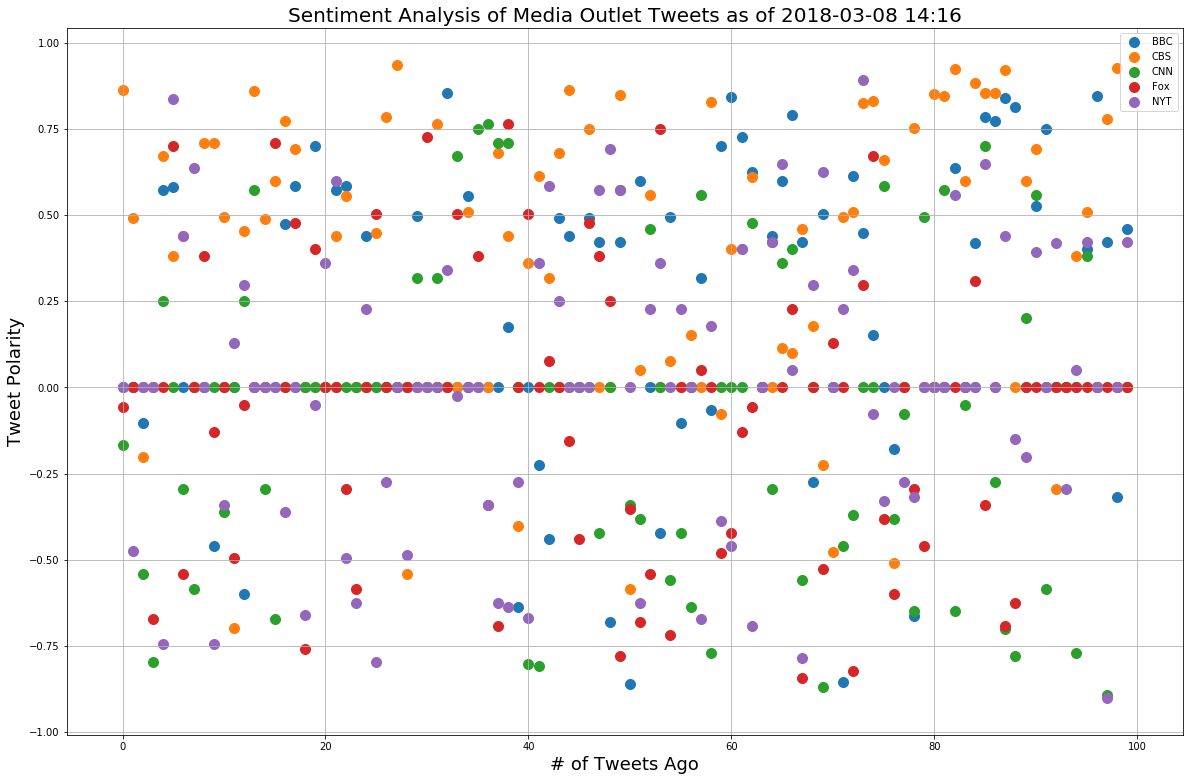

In [67]:
# bbc_df
bbc_df = tweets_df.loc[tweets_df['Media Outlet']=='@BBC', :]

# cbs_df
cbs_df = tweets_df.loc[tweets_df['Media Outlet']=='@CBS', :]

# cnn_df
cnn_df = tweets_df.loc[tweets_df['Media Outlet']=='@CNN', :]

# fox_df
fox_df = tweets_df.loc[tweets_df['Media Outlet']=='@FoxNews', :]

# ny_df
ny_df = tweets_df.loc[tweets_df['Media Outlet']=='@nytimes', :]

# plot each df in scatter plot
plt.scatter(np.arange(len(bbc_df)), bbc_df['Compound Score'], label='BBC', s=100)
plt.scatter(np.arange(len(cbs_df)), cbs_df['Compound Score'], label='CBS', s=100)
plt.scatter(np.arange(len(cnn_df)), cnn_df['Compound Score'], label='CNN', s=100)
plt.scatter(np.arange(len(fox_df)), fox_df['Compound Score'], label='Fox', s=100)
plt.scatter(np.arange(len(ny_df)), ny_df['Compound Score'], label='NYT', s=100)

# set legend loc to best
plt.legend(loc='best')

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size

# labels
plt.title('Sentiment Analysis of Media Outlet Tweets as of ' + today, fontsize='20')
plt.xlabel('# of Tweets Ago', fontsize='18')
plt.ylabel('Tweet Polarity', fontsize='18')

# grid
plt.grid()

# save to png
plt.savefig('outlet_scatter.png')